In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ray
import pickle
import seaborn as sns
from NPDoseResponse import RoTBWLocalPoly
from utils import RoTBWLocalPoly_Old

### Single Confounding Variable
$$S_i \sim_{i.i.d.} \text{Uniform}[-1,1],$$
$$T_i = \sin(\pi S_i) + E_i \quad \text{ with } \quad E_i \sim_{i.i.d.} \text{Uniform}(-0.3,0.3),$$
$$Y_i = T_i^2 + T_i +1 +10S_i + \epsilon_i \quad \text{ with } \quad \epsilon_i \sim_{i.i.d.} \mathcal{N}(0,1) \quad \text{ for } i=1,...,n.$$

Here, $\theta(t)=2t+1$ and $m(t)=t^2+t+1+\mathbb{E}\left(10S_i \right)=t^2+t+1$.

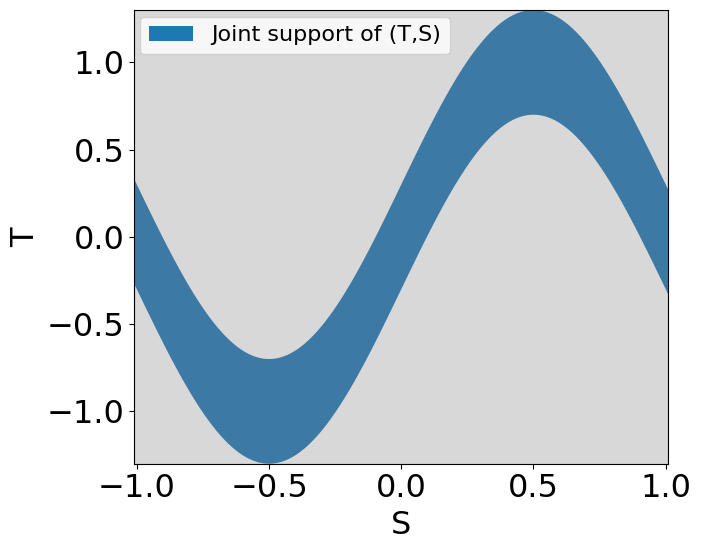

In [2]:
plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(7.5,6))
s_qry = np.linspace(-1.01, 1.01, 200)
plt.fill_between(s_qry, np.sin(np.pi*s_qry)-0.3, np.sin(np.pi*s_qry)+0.3, label='Joint support of (T,S)')
plt.fill_between(s_qry, -1.3, 1.3, color='grey', alpha=0.3)
plt.xlabel('S')
plt.ylabel('T')
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(-0.01, 1.01))
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('./Figures/single_conf_TS.pdf', bbox_inches='tight')

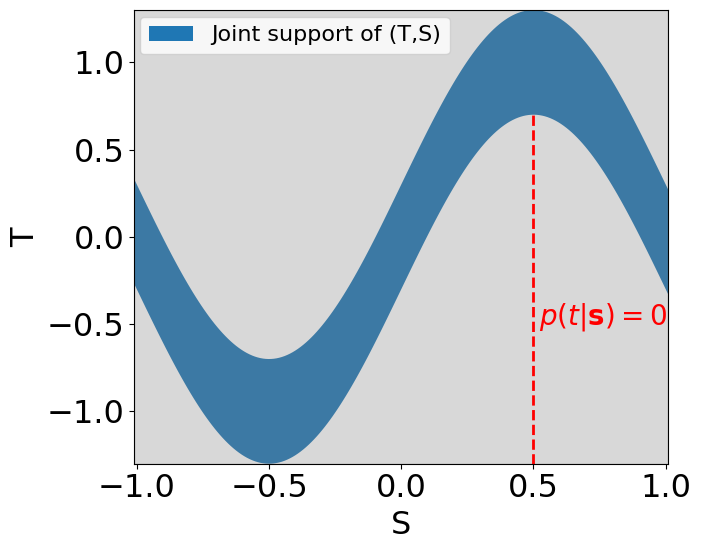

In [3]:
plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(7.5,6))
s_qry = np.linspace(-1.01, 1.01, 200)
plt.fill_between(s_qry, np.sin(np.pi*s_qry)-0.3, np.sin(np.pi*s_qry)+0.3, label='Joint support of (T,S)')
plt.fill_between(s_qry, -1.3, 1.3, color='grey', alpha=0.3)
plt.xlabel('S')
plt.ylabel('T')
plt.axvline(x=0.5, ymax=np.sin(np.pi*0.5)-0.23, color='red', linestyle='dashed', linewidth=2)
plt.text(0.52, -0.5, r'$p(t|\mathbf{s})=0$', fontsize=20, color='red')
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(-0.01, 1.01))
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('./Figures/single_conf_TS2.pdf', bbox_inches='tight')

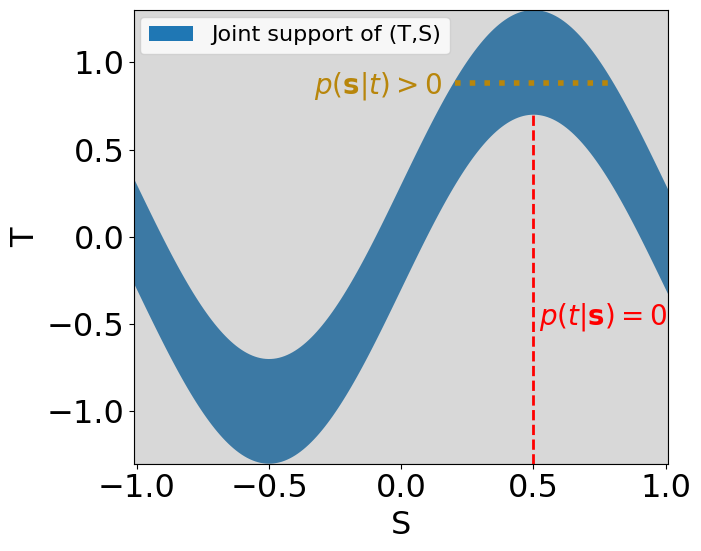

In [4]:
plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(7.5,6))
s_qry = np.linspace(-1.01, 1.01, 200)
plt.fill_between(s_qry, np.sin(np.pi*s_qry)-0.3, np.sin(np.pi*s_qry)+0.3, label='Joint support of (T,S)')
plt.fill_between(s_qry, -1.3, 1.3, color='grey', alpha=0.3)
plt.xlabel('S')
plt.ylabel('T')
plt.axvline(x=0.5, ymax=np.sin(np.pi*0.5)-0.23, color='red', linestyle='dashed', linewidth=2)
plt.text(0.52, -0.5, r'$p(t|\mathbf{s})=0$', fontsize=20, color='red')
plt.axhline(y=0.88, xmin=0.6, xmax=0.9, color='darkgoldenrod', linestyle='dotted', linewidth=4)
plt.text(-0.33, 0.82, r'$p(\mathbf{s}|t)>0$', fontsize=20, color='darkgoldenrod')
plt.legend(fontsize=16, loc='upper left', bbox_to_anchor=(-0.01, 1.01))
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('./Figures/single_conf_TS3.pdf', bbox_inches='tight')

In [7]:
n = 2000
np.random.seed(123)
S1 = 2*np.random.rand(n) - 1
E = np.random.rand(n)*0.6 - 0.3
T1 = np.sin(np.pi*S1) + E
Y1 = T1**2 + T1 + 1 + 10*S1 + np.random.normal(loc=0, scale=1, size=n)
X1 = np.concatenate([T1.reshape(-1,1), S1.reshape(-1,1)], axis=1)

t_qry1 = np.linspace(min(T1)+0.01, max(T1)-0.01, 200)

In [8]:
h_cur1, b_cur1 = RoTBWLocalPoly(Y1, X1, C_h=10, C_b=16, kernT="epanechnikov", kernS="epanechnikov")
print(h_cur1, b_cur1)

h_cur2, b_cur2 = RoTBWLocalPoly_Old(Y1, X1, kernT="epanechnikov", kernS="epanechnikov")
h_cur2, b_cur2

0.9334173837707794 [0.15260724]


(0.8417987141713077, array([0.36051202]))

In [9]:
with open('./Syn_Results/Single_Conf_new_bw_n'+str(n)+'.dat', "rb") as file:
    theta_est1, m_est1, Y_RA1, Y_RA_deriv1, theta_est_boot_arr1, m_est_boot_arr1, \
    Y_RA_deriv_boot_arr1, Y_RA_boot_arr1 = pickle.load(file)

theta_boot_sup1 = np.max(np.abs(theta_est_boot_arr1 - theta_est1), axis=1)
m_boot_sup1 = np.max(np.abs(m_est_boot_arr1 - m_est1), axis=1)
Y_RA_deriv_boot_sup1 = np.max(np.abs(Y_RA_deriv_boot_arr1 - Y_RA_deriv1), axis=1)
Y_RA_boot_sup1 = np.max(np.abs(Y_RA_boot_arr1 - Y_RA1), axis=1)

Y_RA_deriv_alpha1 = np.quantile(Y_RA_deriv_boot_sup1, 0.95)
Y_RA_alpha1 = np.quantile(Y_RA_boot_sup1, 0.95)

theta_alpha1 = np.quantile(theta_boot_sup1, 0.95)
m_alpha1 = np.quantile(m_boot_sup1, 0.95)
print(theta_alpha1)
print(m_alpha1)

2.108322338553154
0.5832699732346197


In [10]:
theta_boot_abs1 = np.abs(theta_est_boot_arr1 - theta_est1)
m_boot_abs1 = np.abs(m_est_boot_arr1 - m_est1)

theta_alpha_var1 = np.quantile(theta_boot_abs1, 0.95, axis=0)
m_alpha_var1 = np.quantile(m_boot_abs1, 0.95, axis=0)

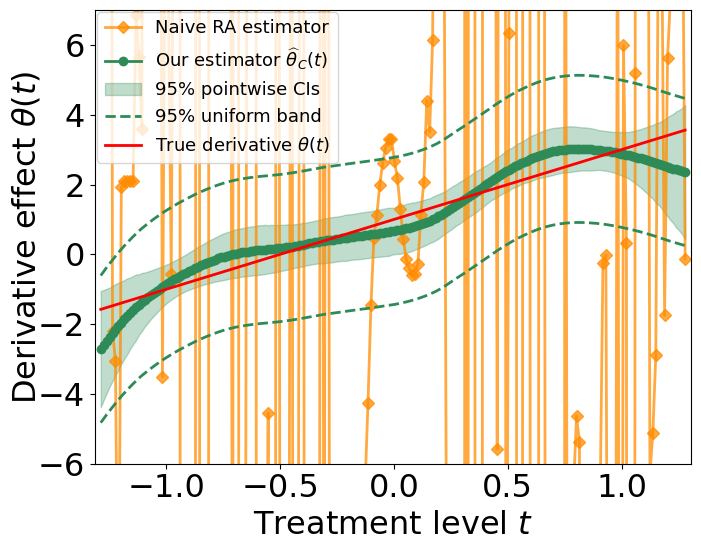

In [11]:
plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(7.5, 6))
plt.plot(t_qry1, Y_RA_deriv1, color='darkorange', marker='D', linewidth=2, alpha=0.75, label=r'Naive RA estimator')
plt.plot(t_qry1, theta_est1, color='seagreen', marker='o', linewidth=2, label=r'Our estimator $\widehat{\theta}_C(t)$')
plt.fill_between(t_qry1, theta_est1 - theta_alpha_var1, theta_est1 + theta_alpha_var1, color='seagreen', 
                 alpha=.3, label='95% pointwise CIs')
plt.plot(t_qry1, theta_est1 - theta_alpha1, linestyle='dashed', color='seagreen', linewidth=2)
plt.plot(t_qry1, theta_est1 + theta_alpha1, linestyle='dashed', color='seagreen', linewidth=2,
         label='95% uniform band')
plt.plot(t_qry1, 2*t_qry1+1, color='red', linewidth=2, label=r'True derivative $\theta(t)$')
plt.ylim([-6,7])
plt.legend(fontsize=13, loc='upper left', bbox_to_anchor=(-0.011, 1.015))
plt.xlabel('Treatment level $t$')
plt.ylabel(r'Derivative effect $\theta(t)$', labelpad=-3)
plt.margins(x=0.01, y=0.012)
plt.tight_layout()
plt.savefig('./Figures/single_conf_theta.pdf', bbox_inches='tight')

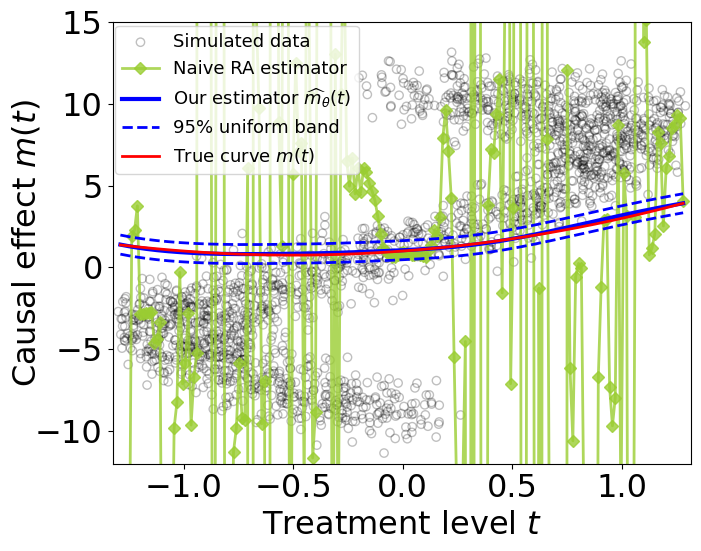

In [12]:
plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(7.5,6))
plt.scatter(T1, Y1, facecolors='none', edgecolors='black', alpha=0.25, 
            label=r'Simulated data')
# sns.rugplot(T, height=0.025, color='grey')
plt.plot(t_qry1, Y_RA1, color='yellowgreen', marker="D", linewidth=2, alpha=0.8, label=r'Naive RA estimator')
plt.plot(t_qry1, m_est1, color='blue', linewidth=3, label=r'Our estimator $\widehat{m}_{\theta}(t)$')
# plt.fill_between(t_qry1, m_est1 - m_alpha_var1, m_est1 + m_alpha_var1, color='b', 
#                  alpha=.3, label='95% pointwise CIs')
plt.plot(t_qry1, m_est1 - m_alpha1, linestyle='dashed', color='blue', linewidth=2)
plt.plot(t_qry1, m_est1 + m_alpha1, linestyle='dashed', color='blue', linewidth=2,
         label='95% uniform band')
plt.plot(t_qry1, t_qry1**2 + t_qry1+1, color='red', linewidth=2, label=r'True curve $m(t)$')
plt.legend(fontsize=13, loc='upper left', bbox_to_anchor=(-0.011, 1.012))
plt.ylim([-12,15])
plt.xlabel('Treatment level $t$')
plt.ylabel(r'Causal effect $m(t)$', labelpad=-5)
plt.margins(x=0.01, y=0.02)
plt.tight_layout()
plt.savefig('./Figures/single_conf_m.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


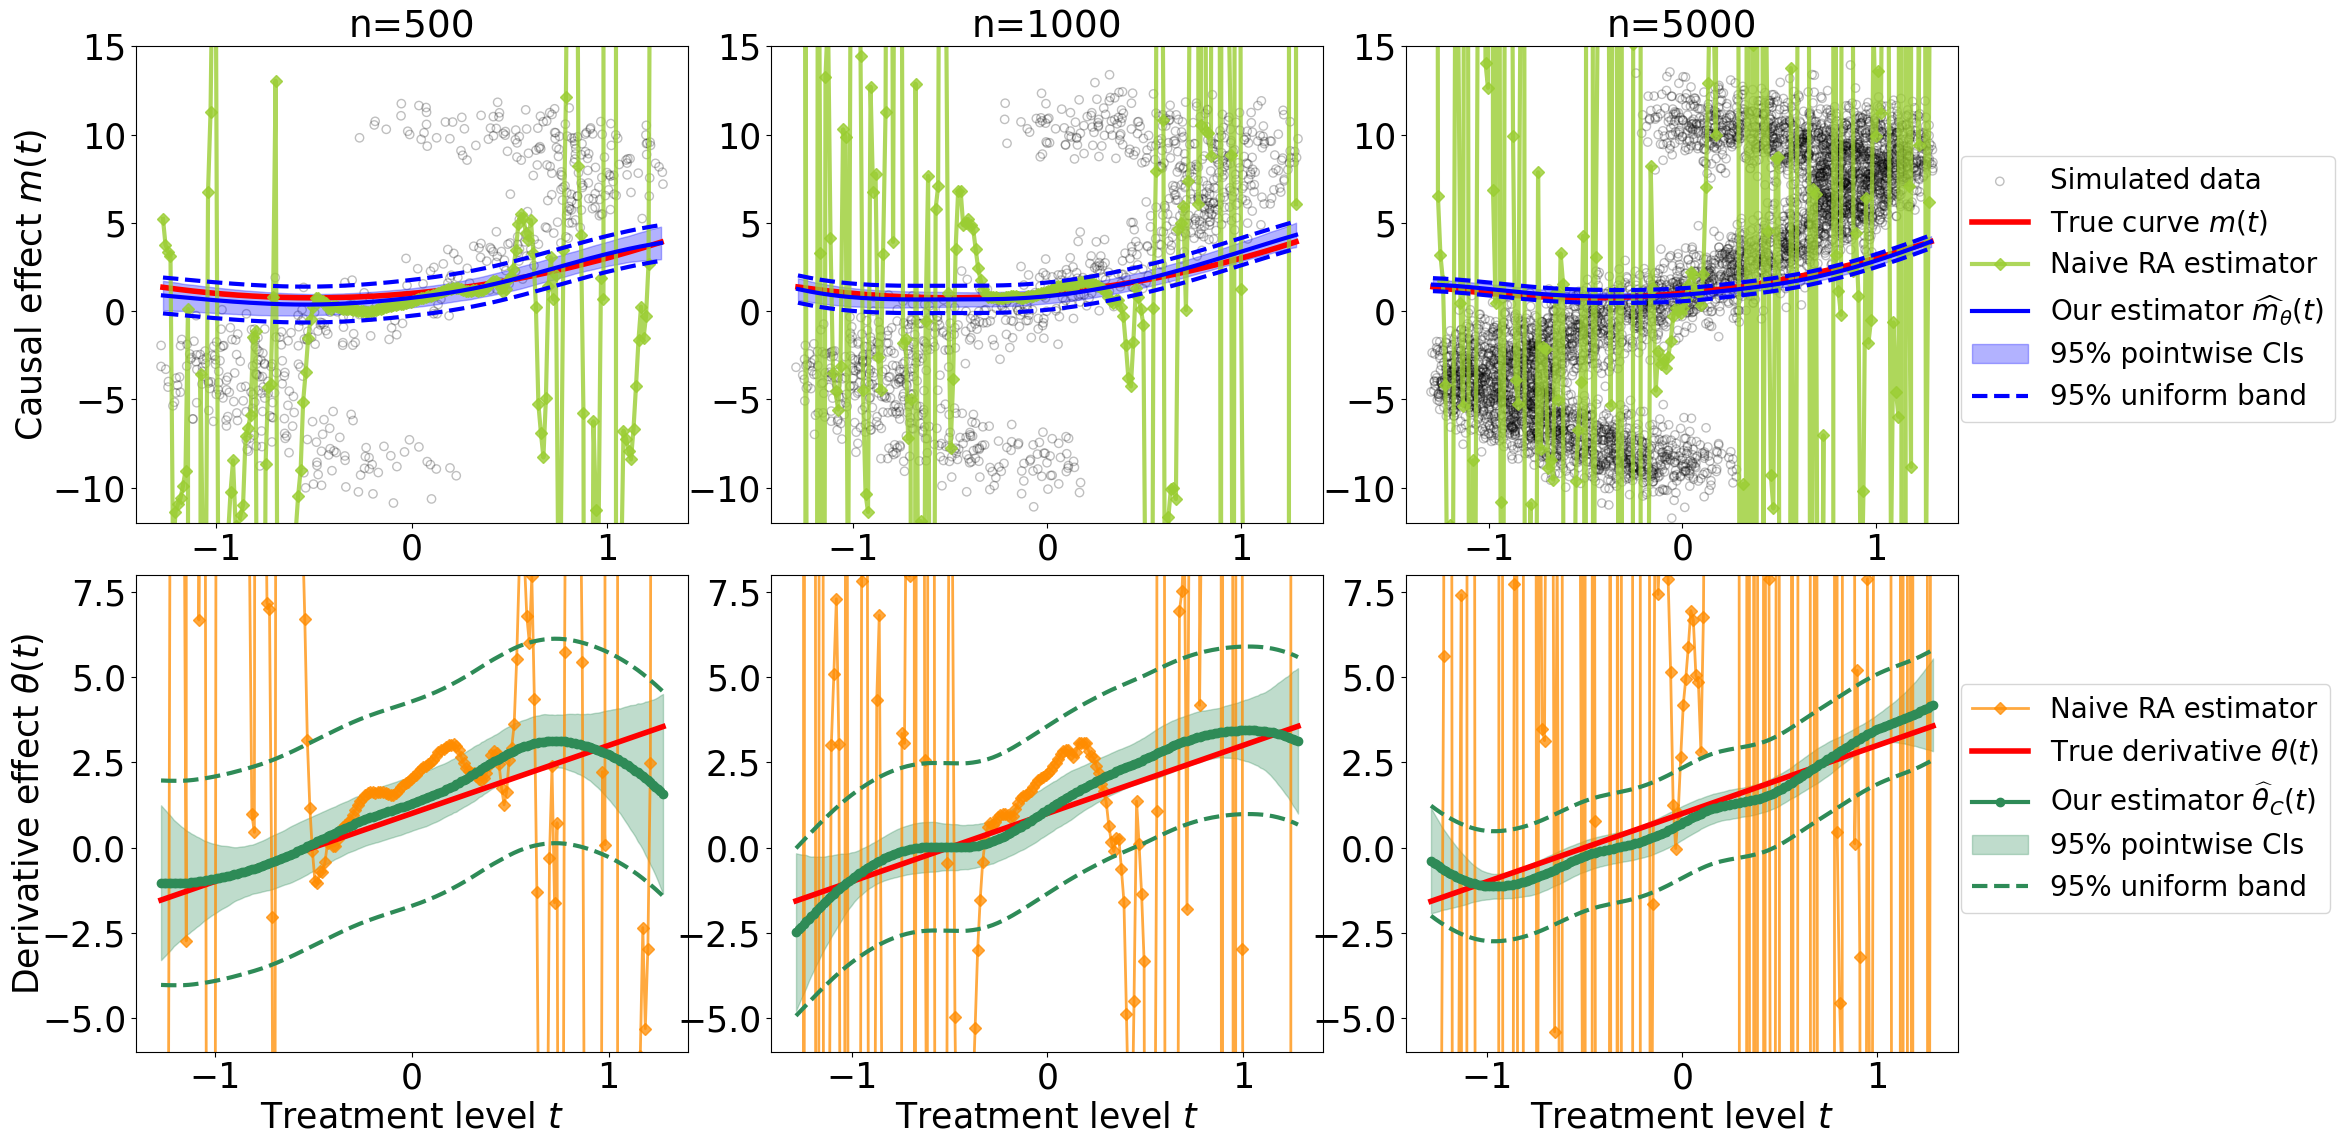

In [37]:
n_lst = [500, 1000, 5000]

j = 0
plt.rcParams.update({'font.size': 25})
fig, ax = plt.subplots(2, 3, figsize=(24, 12))
for n in n_lst:
    np.random.seed(123)
    S1 = 2*np.random.rand(n) - 1
    E = np.random.rand(n)*0.6 - 0.3
    T1 = np.sin(np.pi*S1) + E
    Y1 = T1**2 + T1 + 1 + 10*S1 + np.random.normal(loc=0, scale=1, size=n)
    X1 = np.concatenate([T1.reshape(-1,1), S1.reshape(-1,1)], axis=1)
    
    t_qry1 = np.linspace(min(T1)+0.01, max(T1)-0.01, 200)
    
    cri_in = (t_qry1 >= -1.3) & (t_qry1 <= 1.3)

    with open('./Syn_Results/Single_Conf_new_bw_n'+str(n)+'.dat', "rb") as file:
        theta_est1, m_est1, Y_RA1, Y_RA_deriv1, theta_est_boot_arr1, m_est_boot_arr1, \
        Y_RA_deriv_boot_arr1, Y_RA_boot_arr1 = pickle.load(file)
    
    theta_boot_sup1 = np.max(np.abs(theta_est_boot_arr1 - theta_est1)[:,cri_in], axis=1)
    m_boot_sup1 = np.max(np.abs(m_est_boot_arr1 - m_est1), axis=1)
    Y_RA_deriv_boot_sup1 = np.max(np.abs(Y_RA_deriv_boot_arr1 - Y_RA_deriv1)[:,cri_in], axis=1)
    Y_RA_boot_sup1 = np.max(np.abs(Y_RA_boot_arr1 - Y_RA1), axis=1)
    
    Y_RA_deriv_alpha1 = np.quantile(Y_RA_deriv_boot_sup1, 0.95)
    Y_RA_alpha1 = np.quantile(Y_RA_boot_sup1, 0.95)
    
    theta_alpha1 = np.quantile(theta_boot_sup1, 0.95)
    m_alpha1 = np.quantile(m_boot_sup1, 0.95)
    
    theta_boot_abs1 = np.abs(theta_est_boot_arr1 - theta_est1)[:,cri_in]
    m_boot_abs1 = np.abs(m_est_boot_arr1 - m_est1)
    
    theta_alpha_var1 = np.quantile(theta_boot_abs1, 0.95, axis=0)
    m_alpha_var1 = np.quantile(m_boot_abs1, 0.95, axis=0)
    
    ax[0][j].scatter(T1, Y1, facecolors='none', edgecolors='black', alpha=0.25, label=r'Simulated data')
    ax[0][j].plot(t_qry1, t_qry1**2 + t_qry1+1, color='red', linewidth=4, label=r'True curve $m(t)$')
    ax[0][j].plot(t_qry1, Y_RA1, color='yellowgreen', marker="D", linewidth=3, alpha=0.8, label=r'Naive RA estimator')
    ax[0][j].plot(t_qry1, m_est1, color='blue', linewidth=3, label=r'Our estimator $\widehat{m}_{\theta}(t)$')
    ax[0][j].plot(t_qry1, m_est1 - m_alpha1, linestyle='dashed', color='blue', linewidth=3)
    ax[0][j].fill_between(t_qry1, m_est1 - m_alpha_var1, m_est1 + m_alpha_var1, color='b', 
                 alpha=.3, label='95% pointwise CIs')
    ax[0][j].plot(t_qry1, m_est1 + m_alpha1, linestyle='dashed', color='blue', linewidth=3, label='95% uniform band')
    ax[0][j].set_ylim([-12,15])
    # ax[0][j].set_xlabel('Treatment level $t$')
    ax[0][j].set_title('n='+str(n), fontsize=27)
    ax[0][0].set_ylabel(r'Causal effect $m(t)$', labelpad=-5)
    ax[0][2].legend(bbox_to_anchor=(0.98, 0.8), fontsize=20)
    
    t_qry1 = t_qry1[cri_in]
    theta_est1 = theta_est1[cri_in]
    Y_RA_deriv1 = Y_RA_deriv1[cri_in]
    
    ax[1][j].plot(t_qry1, Y_RA_deriv1, color='darkorange', marker='D', linewidth=2, alpha=0.75, label=r'Naive RA estimator')
    ax[1][j].plot(t_qry1, 2*t_qry1+1, color='red', linewidth=4, label=r'True derivative $\theta(t)$')
    ax[1][j].plot(t_qry1, theta_est1, color='seagreen', marker='o', linewidth=3, label=r'Our estimator $\widehat{\theta}_C(t)$')
    ax[1][j].fill_between(t_qry1, theta_est1 - theta_alpha_var1, theta_est1 + theta_alpha_var1, color='seagreen', alpha=.3, label='95% pointwise CIs')
    ax[1][j].plot(t_qry1, theta_est1 - theta_alpha1, linestyle='dashed', color='seagreen', linewidth=3)
    ax[1][j].plot(t_qry1, theta_est1 + theta_alpha1, linestyle='dashed', color='seagreen', linewidth=3, label='95% uniform band')
    ax[1][j].set_ylim([-6,8])
    ax[1][j].set_xlabel('Treatment level $t$')
    ax[1][0].set_ylabel(r'Derivative effect $\theta(t)$', labelpad=-3)
    ax[1][2].legend(bbox_to_anchor=(0.98, 0.8), fontsize=20)
    
    j += 1
fig.align_ylabels()
fig.tight_layout()
fig.subplots_adjust(wspace=0.15, hspace=0.11)
fig.savefig('./Figures/sing_conf_full.pdf')

### Nonlinear Effect Model
$$\mathbf{S}_i=(S_{i,1},S_{i,2}) \quad \text{ with } \quad S_{i,1},S_{i,2} \sim_{i.i.d.} \text{Uniform}[-1,1],$$
$$Z_i=4S_{i,1} +S_{i,2},$$
$$T_i = \cos(\pi Z_i^3) + Z_i/4 + E_i \quad \text{ with } \quad E_i \sim_{i.i.d.} \text{Uniform}(-0.1,0.1),$$
$$Y_i = T_i^2+T_i+10Z_i + \epsilon_i \quad \text{ with } \quad \epsilon_i \sim_{i.i.d.} \mathcal{N}(0,1) \quad \text{ for } i=1,...,n.$$

Here, $\theta(t)=2t+1$ and $m(t)=t^2+t+\mathbb{E}\left(Z_i \right)=t^2+t$.

In [19]:
n = 2000
np.random.seed(123)
S = np.concatenate([2*np.random.rand(n).reshape(-1,1) - 1, 
                    2*np.random.rand(n).reshape(-1,1) - 1], axis=1)
Z = 4*S[:,0] + S[:,1]
E = 0.2*np.random.rand(n) - 0.1
T = np.cos(np.pi*Z**3) + Z/4 + E
Y = T**2 + T + 10*Z + np.random.normal(loc=0, scale=1, size=n)
X = np.concatenate([T.reshape(-1,1), S], axis=1)

t_qry = np.linspace(min(T)+0.01, max(T)-0.01, 200)

In [20]:
h_cur1, b_cur1 = RoTBWLocalPoly(Y, X, C_h=10, C_b=15, kernT="epanechnikov", kernS="epanechnikov")
print(h_cur1, b_cur1)

h_cur2, b_cur2 = RoTBWLocalPoly_Old(Y, X, kernT="epanechnikov", kernS="epanechnikov")
h_cur2, b_cur2

0.8905197370954137 [0.61136067 0.61133728]


(0.962436034227205, array([0.52010989, 0.52008999]))

In [21]:
with open('./Syn_Results/Nonlinear_Eff_new_bw_n'+str(n)+'.dat', "rb") as file:
    theta_est, m_est, Y_RA, Y_RA_deriv, theta_est_boot_arr, m_est_boot_arr, \
    Y_RA_deriv_boot_arr, Y_RA_boot_arr = pickle.load(file)
theta_boot_sup = np.max(np.abs(theta_est_boot_arr - theta_est), axis=1)
m_boot_sup = np.max(np.abs(m_est_boot_arr - m_est), axis=1)

theta_alpha = np.quantile(theta_boot_sup, 0.95)
m_alpha = np.quantile(m_boot_sup, 0.95)
print(theta_alpha)
print(m_alpha)

5.938610452291639
1.6620983064151453


In [22]:
theta_boot_abs = np.abs(theta_est_boot_arr - theta_est)
m_boot_abs = np.abs(m_est_boot_arr - m_est)

theta_alpha_var = np.quantile(theta_boot_abs, 0.95, axis=0)
m_alpha_var = np.quantile(m_boot_abs, 0.95, axis=0)

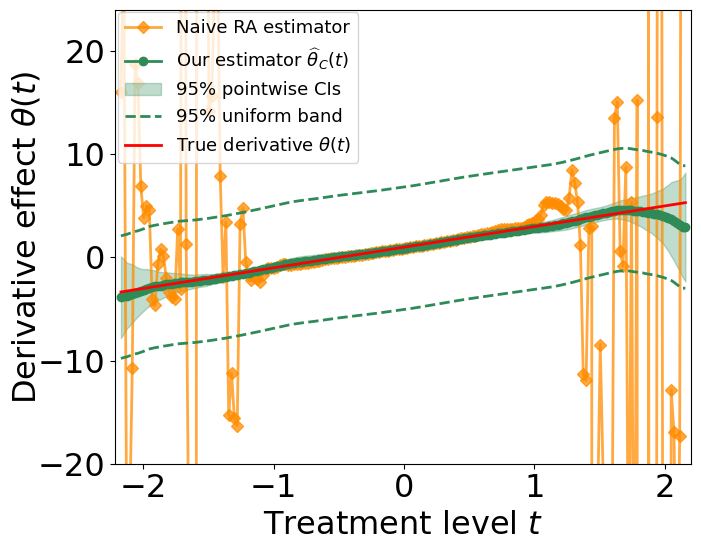

In [23]:
plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(7.5, 6))
plt.plot(t_qry, Y_RA_deriv, color='darkorange', marker='D', linewidth=2, alpha=0.75, 
         label=r'Naive RA estimator')
plt.plot(t_qry, theta_est, color='seagreen', marker='o', linewidth=2, label=r'Our estimator $\widehat{\theta}_C(t)$')
plt.fill_between(t_qry, theta_est - theta_alpha_var, theta_est + theta_alpha_var, color='seagreen', 
                 alpha=.3, label='95% pointwise CIs')
plt.plot(t_qry, theta_est - theta_alpha, linestyle='dashed', color='seagreen', linewidth=2)
plt.plot(t_qry, theta_est + theta_alpha, linestyle='dashed', color='seagreen', linewidth=2,
         label='95% uniform band')
plt.plot(t_qry, 2*t_qry+1, color='red', linewidth=2, label=r'True derivative $\theta(t)$')
plt.ylim([-20,24])
plt.legend(fontsize=13, loc='upper left', bbox_to_anchor=(-0.011, 1.015))
plt.xlabel('Treatment level $t$')
plt.ylabel(r'Derivative effect $\theta(t)$', labelpad=-3)
plt.margins(x=0.01, y=0.012)
plt.tight_layout()
plt.savefig('./Figures/nonlin_conf_theta.pdf', bbox_inches='tight')

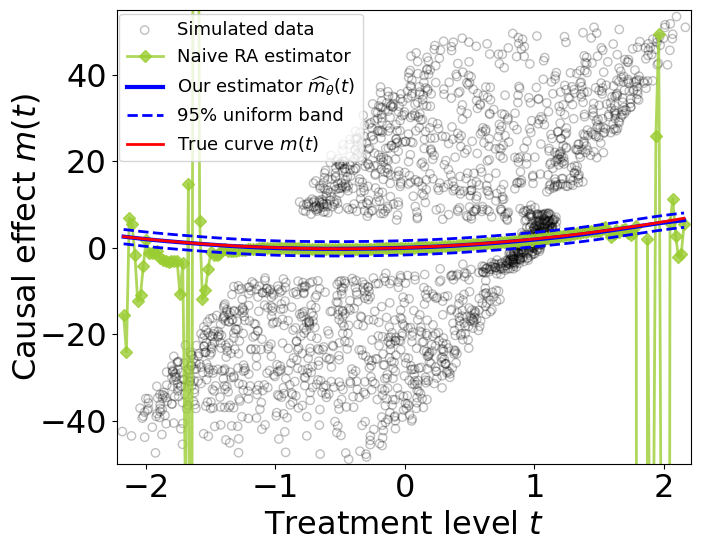

In [24]:
plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(7.5,6))
plt.scatter(T, Y, facecolors='none', edgecolors='black', alpha=0.25, 
            label=r'Simulated data')
# sns.rugplot(T, height=0.025, color='grey')
plt.plot(t_qry, Y_RA, color='yellowgreen', marker="D", linewidth=2, alpha=0.8, label=r'Naive RA estimator')
plt.plot(t_qry, m_est, color='blue', linewidth=3, label=r'Our estimator $\widehat{m}_{\theta}(t)$')
# plt.fill_between(t_qry1, m_est1 - m_alpha_var1, m_est1 + m_alpha_var1, color='b', 
#                  alpha=.3, label='95% pointwise CIs')
plt.plot(t_qry, m_est - m_alpha, linestyle='dashed', color='blue', linewidth=2)
plt.plot(t_qry, m_est + m_alpha, linestyle='dashed', color='blue', linewidth=2,
         label='95% uniform band')
plt.plot(t_qry, t_qry**2 + t_qry, color='red', linewidth=2, label=r'True curve $m(t)$')
plt.legend(fontsize=13, loc='upper left', bbox_to_anchor=(-0.011, 1.012))
plt.ylim([-50, 55])
plt.xlabel('Treatment level $t$')
plt.ylabel(r'Causal effect $m(t)$', labelpad=-2)
plt.margins(x=0.01, y=0.02)
plt.tight_layout()
plt.savefig('./Figures/nonlin_conf_m.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


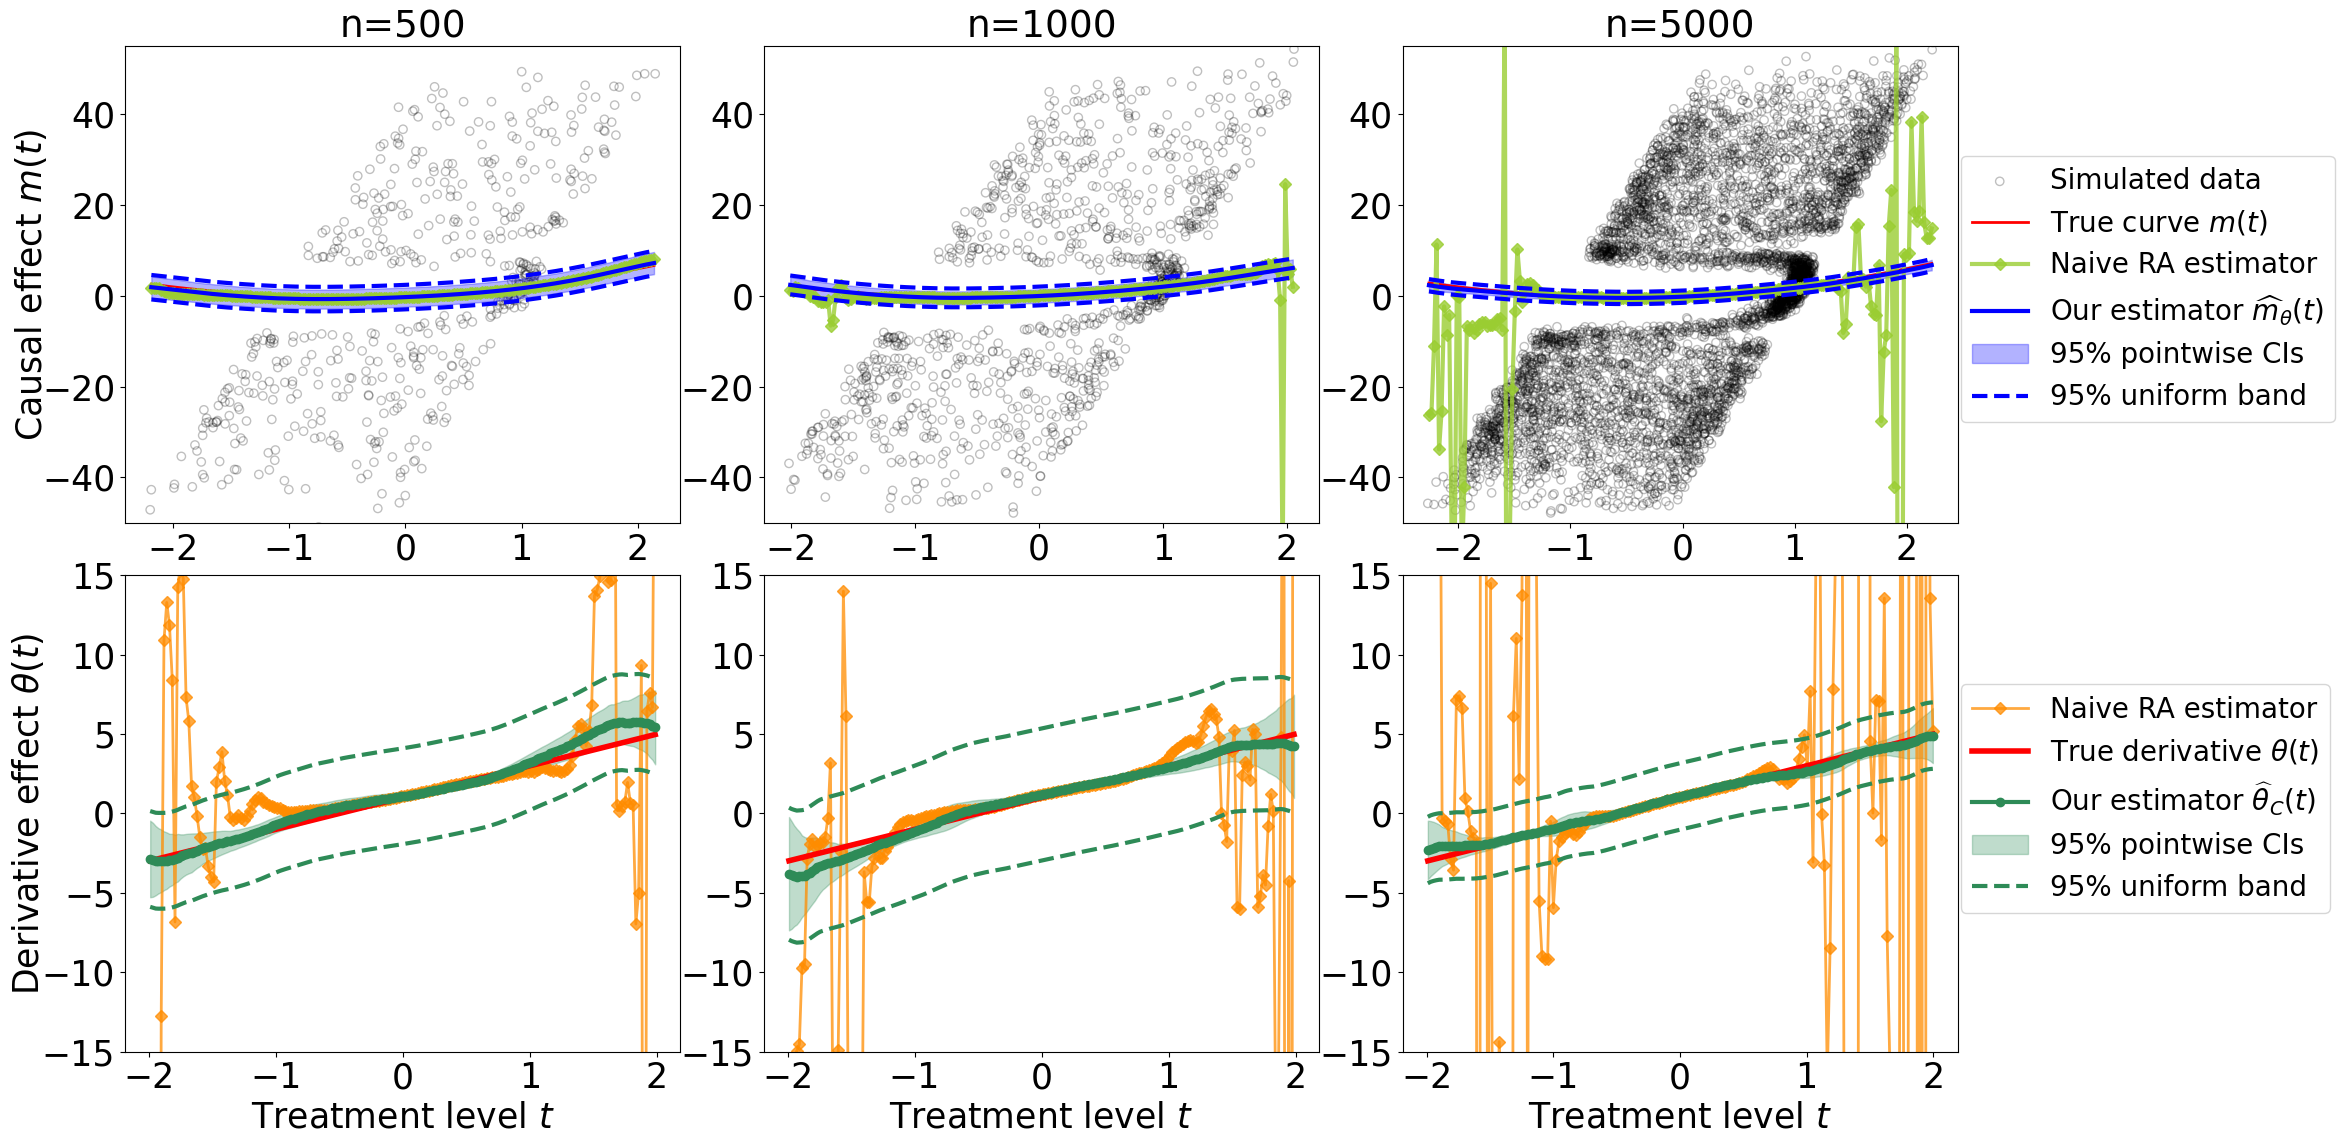

In [29]:
n_lst = [500, 1000, 5000]

j = 0
plt.rcParams.update({'font.size': 25})
fig, ax = plt.subplots(2, 3, figsize=(24, 12))
for n in n_lst:
    np.random.seed(123)
    S = np.concatenate([2*np.random.rand(n).reshape(-1,1) - 1, 
                        2*np.random.rand(n).reshape(-1,1) - 1], axis=1)
    Z = 4*S[:,0] + S[:,1]
    E = 0.2*np.random.rand(n) - 0.1
    T = np.cos(np.pi*Z**3) + Z/4 + E
    Y = T**2 + T + 10*Z + np.random.normal(loc=0, scale=1, size=n)
    X = np.concatenate([T.reshape(-1,1), S], axis=1)
    
    t_qry = np.linspace(min(T)+0.01, max(T)-0.01, 200)
    
    cri_in = (t_qry >= -2) & (t_qry <= 2)
    
    with open('./Syn_Results/Nonlinear_Eff_new_bw_n'+str(n)+'.dat', "rb") as file:
        theta_est, m_est, Y_RA, Y_RA_deriv, theta_est_boot_arr, m_est_boot_arr, \
        Y_RA_deriv_boot_arr, Y_RA_boot_arr = pickle.load(file)
    
    theta_boot_sup = np.max(np.abs(theta_est_boot_arr - theta_est)[:,cri_in], axis=1)
    m_boot_sup = np.max(np.abs(m_est_boot_arr - m_est), axis=1)
    Y_RA_deriv_boot_sup = np.max(np.abs(Y_RA_deriv_boot_arr - Y_RA_deriv)[:,cri_in], axis=1)
    Y_RA_boot_sup = np.max(np.abs(Y_RA_boot_arr - Y_RA), axis=1)
    
    Y_RA_deriv_alpha = np.quantile(Y_RA_deriv_boot_sup, 0.95)
    Y_RA_alpha = np.quantile(Y_RA_boot_sup, 0.95)
    
    theta_alpha = np.quantile(theta_boot_sup, 0.95)
    m_alpha = np.quantile(m_boot_sup, 0.95)
    
    theta_boot_abs = np.abs(theta_est_boot_arr - theta_est)[:,cri_in]
    m_boot_abs = np.abs(m_est_boot_arr - m_est)
    
    theta_alpha_var = np.quantile(theta_boot_abs, 0.95, axis=0)
    m_alpha_var = np.quantile(m_boot_abs, 0.95, axis=0)
    
    ax[0][j].scatter(T, Y, facecolors='none', edgecolors='black', alpha=0.25, label=r'Simulated data')
    ax[0][j].plot(t_qry, t_qry**2 + t_qry, color='red', linewidth=2, label=r'True curve $m(t)$')
    ax[0][j].plot(t_qry, Y_RA, color='yellowgreen', marker="D", linewidth=3, alpha=0.8, label=r'Naive RA estimator')
    ax[0][j].plot(t_qry, m_est, color='blue', linewidth=3, label=r'Our estimator $\widehat{m}_{\theta}(t)$')
    ax[0][j].fill_between(t_qry, m_est - m_alpha_var, m_est + m_alpha_var, color='blue', alpha=.3, label='95% pointwise CIs')
    ax[0][j].plot(t_qry, m_est - m_alpha, linestyle='dashed', color='blue', linewidth=3)
    ax[0][j].plot(t_qry, m_est + m_alpha, linestyle='dashed', color='blue', linewidth=3, label='95% uniform band')
    ax[0][j].set_ylim([-50, 55])
    # ax[0][j].set_xlabel('Treatment level $t$')
    ax[0][j].set_title('n='+str(n), fontsize=27)
    ax[0][0].set_ylabel(r'Causal effect $m(t)$', labelpad=-5)
    ax[0][2].legend(bbox_to_anchor=(0.98, 0.8), fontsize=20)
    
    t_qry = t_qry[cri_in]
    theta_est = theta_est[cri_in]
    Y_RA_deriv = Y_RA_deriv[cri_in]
    
    ax[1][j].plot(t_qry, Y_RA_deriv, color='darkorange', marker='D', linewidth=2, alpha=0.75, label=r'Naive RA estimator')
    ax[1][j].plot(t_qry, 2*t_qry+1, color='red', linewidth=4, label=r'True derivative $\theta(t)$')
    ax[1][j].plot(t_qry, theta_est, color='seagreen', marker='o', linewidth=3, label=r'Our estimator $\widehat{\theta}_C(t)$')
    ax[1][j].fill_between(t_qry, theta_est - theta_alpha_var, theta_est + theta_alpha_var, color='seagreen', alpha=.3, label='95% pointwise CIs')
    ax[1][j].plot(t_qry, theta_est - theta_alpha, linestyle='dashed', color='seagreen', linewidth=3)
    ax[1][j].plot(t_qry, theta_est + theta_alpha, linestyle='dashed', color='seagreen', linewidth=3, label='95% uniform band')
    ax[1][j].set_ylim([-15,15])
    ax[1][j].set_xlabel('Treatment level $t$')
    ax[1][0].set_ylabel(r'Derivative effect $\theta(t)$', labelpad=-3)
    ax[1][2].legend(bbox_to_anchor=(0.98, 0.8), fontsize=20)
    
    j += 1
fig.align_ylabels()
fig.tight_layout()
fig.subplots_adjust(wspace=0.15, hspace=0.11)
fig.savefig('./Figures/nonlin_conf_full.pdf')

### Linear Confounding Model

$$\mathbf{S}_i=(S_{i,1},S_{i,2}) \quad \text{ with } \quad S_{i,1},S_{i,2} \sim_{i.i.d.} \text{Uniform}[-1,1],$$
$$T_i = 2S_{i,1} +S_{i,2} + E_i \quad \text{ with } \quad E_i \sim_{i.i.d.} \text{Uniform}[-0.5,0.5],$$
$$Y_i = T_i+6S_{i,1} +6S_{i,2} + \epsilon_i \quad \text{ with } \quad \epsilon_i \sim_{i.i.d.} \mathcal{N}(0,1) \quad \text{ for } \quad i=1,...,n.$$

Here, $\theta(t)=1$ and $m(t)=t+\mathbb{E}\left(6S_{i,1} +6S_{i,2} \right)=t$.

In [30]:
n = 2000
np.random.seed(123)
S3 = np.concatenate([2*np.random.rand(n).reshape(-1,1) - 1, 
                     2*np.random.rand(n).reshape(-1,1) - 1], axis=1)
E3 = np.random.rand(n) - 0.5
T3 = 2*S3[:,0] + S3[:,1] + E3
Y3 = T3 + 6*S3[:,0] + 6*S3[:,1] + np.random.normal(loc=0, scale=1, size=n)
X3 = np.concatenate([T3.reshape(-1,1), S3], axis=1)

t_qry3 = np.linspace(min(T3), max(T3), 200)

In [31]:
h_cur1, b_cur1 = RoTBWLocalPoly(Y3, X3, C_h=10, C_b=15, kernT="epanechnikov", kernS="epanechnikov")
print(h_cur1, b_cur1)

h_cur2, b_cur2 = RoTBWLocalPoly_Old(Y3, X3, kernT="epanechnikov", kernS="epanechnikov")
h_cur2, b_cur2

2.6363162238658067 [0.79997218 0.79994158]


(2.849218973789452, array([0.68056952, 0.68054349]))

In [32]:
with open('./Syn_Results/Linear_Conf_new_bw_n'+str(n)+'.dat', "rb") as file:
    theta_est3, m_est3, Y3_RA, Y3_RA_deriv, theta_est3_boot_arr, m_est3_boot_arr, \
    Y_RA_deriv_boot_arr3, Y_RA_boot_arr3 = pickle.load(file)
theta_boot3_sup = np.max(np.abs(theta_est3_boot_arr - theta_est3), axis=1)
m_boot3_sup = np.max(np.abs(m_est3_boot_arr - m_est3), axis=1)

theta_alpha3 = np.quantile(theta_boot3_sup, 0.95)
m_alpha3 = np.quantile(m_boot3_sup, 0.95)
print(theta_alpha3)
m_alpha3

1.1996064845984487


0.9915007909738661

In [33]:
theta_boot3_abs = np.abs(theta_est3_boot_arr - theta_est3)
m_boot3_abs = np.abs(m_est3_boot_arr - m_est3)

theta_alpha_var3 = np.quantile(theta_boot3_abs, 0.95, axis=0)
m_alpha_var3 = np.quantile(m_boot3_abs, 0.95, axis=0)

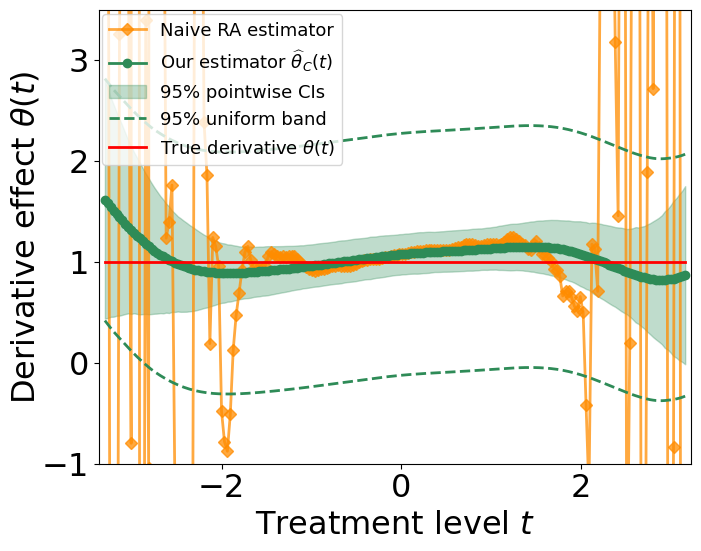

In [35]:
plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(7.5,6))
plt.plot(t_qry3, Y3_RA_deriv, color='darkorange', marker='D', linewidth=2, alpha=0.75, label=r'Naive RA estimator')
plt.plot(t_qry3, theta_est3, color='seagreen', marker='o', linewidth=2, label=r'Our estimator $\widehat{\theta}_C(t)$')
plt.fill_between(t_qry3, theta_est3 - theta_alpha_var3, theta_est3 + theta_alpha_var3, color='seagreen', 
                 alpha=.3, label='95% pointwise CIs')
plt.plot(t_qry3, theta_est3 - theta_alpha3, linestyle='dashed', color='seagreen', linewidth=2)
plt.plot(t_qry3, theta_est3 + theta_alpha3, linestyle='dashed', color='seagreen', linewidth=2,
         label='95% uniform band')
plt.plot(t_qry3, np.ones_like(t_qry3), color='red', linewidth=2, label=r'True derivative $\theta(t)$')
plt.ylim([-1,3.5])
plt.legend(fontsize=13, loc='upper left', bbox_to_anchor=(-0.01, 1.01))
plt.xlabel('Treatment level $t$')
plt.ylabel(r'Derivative effect $\theta(t)$', labelpad=0)
plt.margins(x=0.01, y=0.012)
plt.tight_layout()
plt.savefig('./Figures/linear_conf_theta.pdf', bbox_inches='tight')

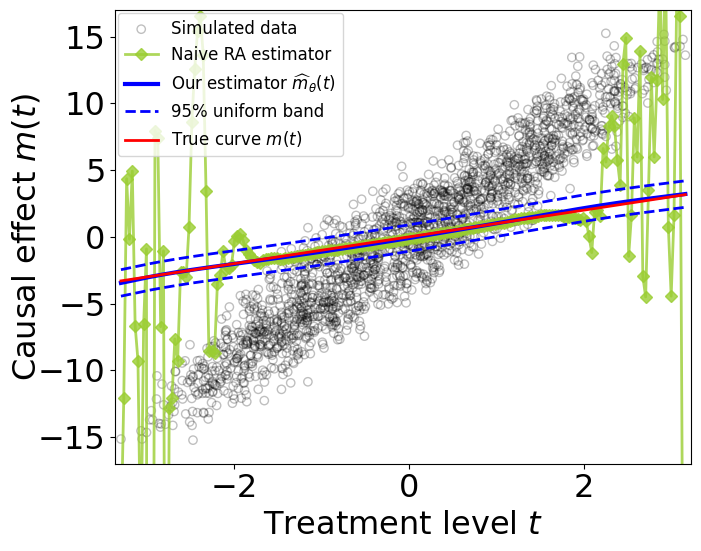

In [36]:
plt.rcParams.update({'font.size': 23})
plt.figure(figsize=(7.5,6))
plt.scatter(T3, Y3, facecolors='none', edgecolors='black', alpha=0.25, 
            label=r'Simulated data')
# sns.rugplot(T, height=0.025, color='grey')
plt.plot(t_qry3, Y3_RA, color='yellowgreen', marker="D", linewidth=2, alpha=0.8, label=r'Naive RA estimator')
plt.plot(t_qry3, m_est3, color='blue', linewidth=3, label=r'Our estimator $\widehat{m}_{\theta}(t)$')
# plt.fill_between(t_qry3, m_est3 - m_alpha_var3, m_est3 + m_alpha_var3, color='b', 
#                  alpha=.3, label='95% pointwise confidence intervals')
plt.plot(t_qry3, m_est3 - m_alpha3, linestyle='dashed', color='blue', linewidth=2)
plt.plot(t_qry3, m_est3 + m_alpha3, linestyle='dashed', color='blue', linewidth=2,
         label='95% uniform band')
plt.plot(t_qry3, t_qry3, color='red', linewidth=2, label=r'True curve $m(t)$')
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(-0.01, 1.012))
plt.ylim([-17,17])
plt.xlabel('Treatment level $t$')
plt.ylabel(r'Causal effect $m(t)$', labelpad=-3)
plt.margins(x=0.01, y=0.02)
plt.tight_layout()
plt.savefig('./Figures/linear_conf_m.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


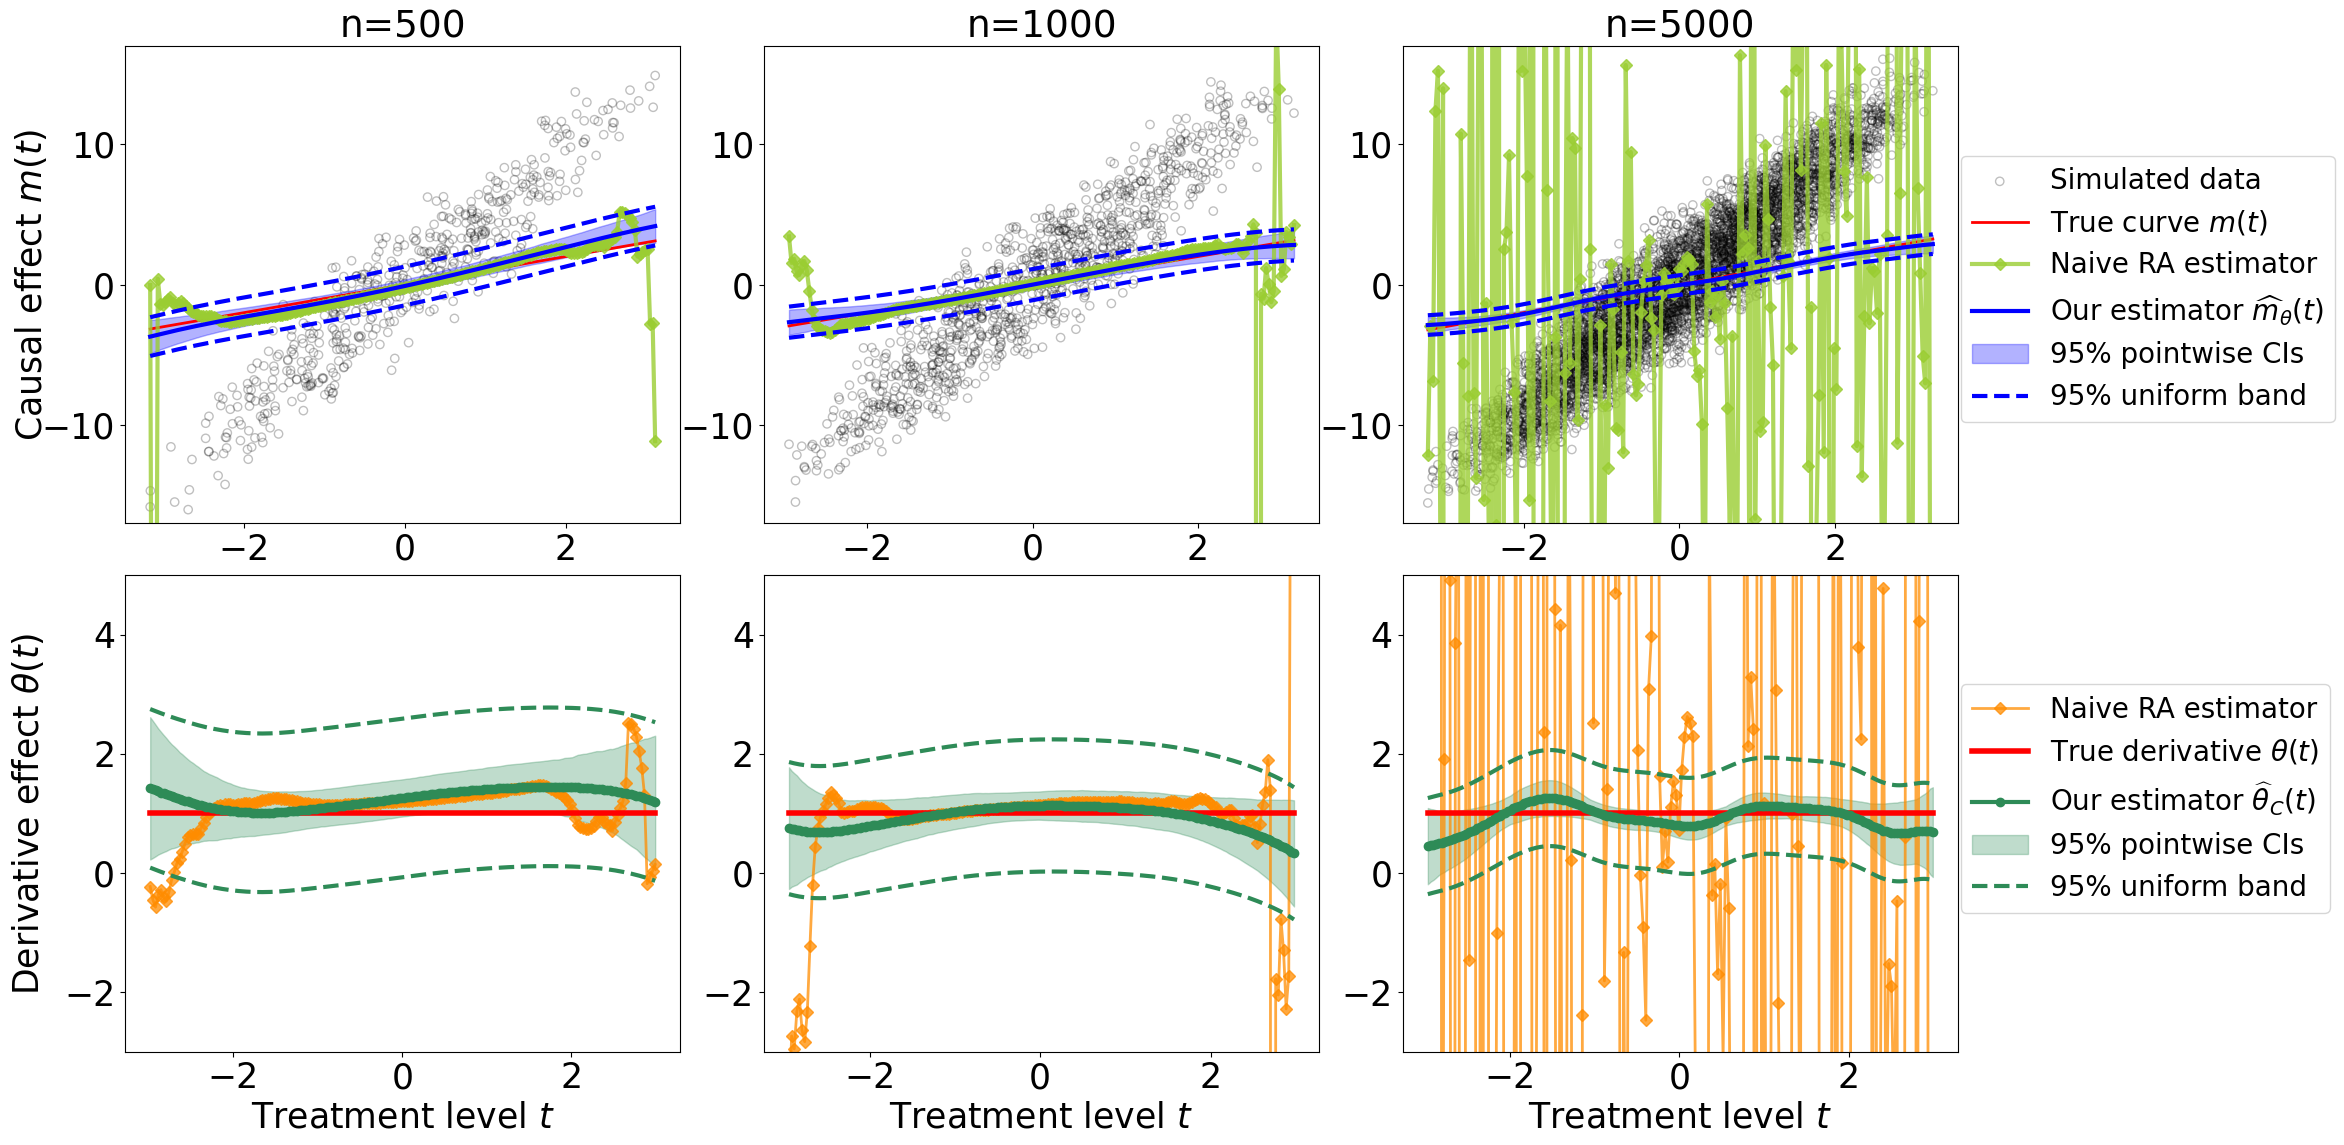

In [40]:
n_lst = [500, 1000, 5000]

j = 0
plt.rcParams.update({'font.size': 25})
fig, ax = plt.subplots(2, 3, figsize=(24, 12))
for n in n_lst:
    np.random.seed(123)
    S3 = np.concatenate([2*np.random.rand(n).reshape(-1,1) - 1, 
                         2*np.random.rand(n).reshape(-1,1) - 1], axis=1)
    E3 = np.random.rand(n) - 0.5
    T3 = 2*S3[:,0] + S3[:,1] + E3
    Y3 = T3 + 6*S3[:,0] + 6*S3[:,1] + np.random.normal(loc=0, scale=1, size=n)
    X3 = np.concatenate([T3.reshape(-1,1), S3], axis=1)
    
    t_qry3 = np.linspace(min(T3), max(T3), 200)
    
    cri_in = (t_qry3 >= -3) & (t_qry3 <= 3)
    
    with open('./Syn_Results/Linear_Conf_new_bw_n'+str(n)+'.dat', "rb") as file:
        theta_est3, m_est3, Y3_RA, Y3_RA_deriv, theta_est3_boot_arr, m_est3_boot_arr, \
        Y_RA_deriv_boot_arr3, Y_RA_boot_arr3 = pickle.load(file)
    theta_boot3_sup = np.max(np.abs(theta_est3_boot_arr - theta_est3)[:,cri_in], axis=1)
    m_boot3_sup = np.max(np.abs(m_est3_boot_arr - m_est3), axis=1)
    
    Y_RA_deriv_boot_sup3 = np.max(np.abs(Y_RA_deriv_boot_arr3 - Y3_RA_deriv)[:,cri_in], axis=1)
    Y_RA_boot_sup3 = np.max(np.abs(Y_RA_boot_arr3 - Y3_RA), axis=1)
    
    Y_RA_deriv_alpha3 = np.quantile(Y_RA_deriv_boot_sup3, 0.95)
    Y_RA_alpha3 = np.quantile(Y_RA_boot_sup3, 0.95)
    
    theta_alpha3 = np.quantile(theta_boot3_sup, 0.95)
    m_alpha3 = np.quantile(m_boot3_sup, 0.95)
    
    theta_boot_abs3 = np.abs(theta_est3_boot_arr - theta_est3)[:,cri_in]
    m_boot_abs3 = np.abs(m_est3_boot_arr - m_est3)
    
    theta_alpha_var3 = np.quantile(theta_boot_abs3, 0.95, axis=0)
    m_alpha_var3 = np.quantile(m_boot_abs3, 0.95, axis=0)
    
    ax[0][j].scatter(T3, Y3, facecolors='none', edgecolors='black', alpha=0.25, label=r'Simulated data')
    ax[0][j].plot(t_qry3, t_qry3, color='red', linewidth=2, label=r'True curve $m(t)$')
    ax[0][j].plot(t_qry3, Y3_RA, color='yellowgreen', marker="D", linewidth=3, alpha=0.8, label=r'Naive RA estimator')
    ax[0][j].plot(t_qry3, m_est3, color='blue', linewidth=3, label=r'Our estimator $\widehat{m}_{\theta}(t)$')
    ax[0][j].fill_between(t_qry3, m_est3 - m_alpha_var3, m_est3 + m_alpha_var3, color='blue', alpha=.3, label='95% pointwise CIs')
    ax[0][j].plot(t_qry3, m_est3 - m_alpha3, linestyle='dashed', color='blue', linewidth=3)
    ax[0][j].plot(t_qry3, m_est3 + m_alpha3, linestyle='dashed', color='blue', linewidth=3, label='95% uniform band')
    ax[0][j].set_ylim([-17,17])
    # ax[0][j].set_xlabel('Treatment level $t$')
    ax[0][j].set_title('n='+str(n), fontsize=27)
    ax[0][0].set_ylabel(r'Causal effect $m(t)$', labelpad=-5)
    ax[0][2].legend(bbox_to_anchor=(0.98, 0.8), fontsize=20)
    
    t_qry3 = t_qry3[cri_in]
    theta_est3 = theta_est3[cri_in]
    Y3_RA_deriv = Y3_RA_deriv[cri_in]
    
    ax[1][j].plot(t_qry3, Y3_RA_deriv, color='darkorange', marker='D', linewidth=2, alpha=0.75, label=r'Naive RA estimator')
    ax[1][j].plot(t_qry3, np.ones_like(t_qry3), color='red', linewidth=4, label=r'True derivative $\theta(t)$')
    ax[1][j].plot(t_qry3, theta_est3, color='seagreen', marker='o', linewidth=3, label=r'Our estimator $\widehat{\theta}_C(t)$')
    ax[1][j].fill_between(t_qry3, theta_est3 - theta_alpha_var3, theta_est3 + theta_alpha_var3, color='seagreen', alpha=.3, label='95% pointwise CIs')
    ax[1][j].plot(t_qry3, theta_est3 - theta_alpha3, linestyle='dashed', color='seagreen', linewidth=3)
    ax[1][j].plot(t_qry3, theta_est3 + theta_alpha3, linestyle='dashed', color='seagreen', linewidth=3, label='95% uniform band')
    ax[1][j].set_ylim([-3,5])
    ax[1][j].set_xlabel('Treatment level $t$')
    ax[1][0].set_ylabel(r'Derivative effect $\theta(t)$', labelpad=-3)
    ax[1][2].legend(bbox_to_anchor=(0.98, 0.8), fontsize=20)
    
    j += 1
fig.align_ylabels()
fig.tight_layout()
fig.subplots_adjust(wspace=0.15, hspace=0.11)
fig.savefig('./Figures/linear_conf_full.pdf')